In [1]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import re # regular expression for string operations
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore")


In [2]:
import csv
import pandas as pd

file_nm="Zip_Zhvi_SingleFamilyResidence.csv"
Zip_Zhvi_SingleFamilyResidence_df=pd.read_csv(file_nm,encoding ='latin1')

Zip_Zhvi_SingleFamilyResidence_df.head()
                

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1050700,1055700,1063100,1072900,1085700,1089400,1076200,1059200,1049000,1047400
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,335700,335100,334100,333500,333500,333400,331900,329600,327700,326700
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1325200,1331700,1341300,1348700,1354400,1353900,1342300,1327700,1316700,1313300
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,180800,181900,183400,183300,182100,182000,183400,184700,186000,186900
4,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95000.0,95200.0,95400.0,...,173700,175600,177700,177900,176400,176400,178300,179800,181000,182000


In [3]:
Zip_Zhvi_AR=Zip_Zhvi_SingleFamilyResidence_df.loc[((Zip_Zhvi_SingleFamilyResidence_df['City']=='Hot Springs') \
                                        |(Zip_Zhvi_SingleFamilyResidence_df['City']=='Little Rock') \
                                        |(Zip_Zhvi_SingleFamilyResidence_df['City']=='Fayetteville') \
                                        |(Zip_Zhvi_SingleFamilyResidence_df['City']=='Searcy')) \
                                       & (Zip_Zhvi_SingleFamilyResidence_df['State']=='AR'),]

In [4]:
Zip_Zhvi_AR_Mean=Zip_Zhvi_AR[map(lambda x :x not in ['RegionID','RegionName','City','State','CountyName','SizeRank'], list(Zip_Zhvi_AR.columns))]\
.groupby('Metro').mean()

In [5]:
Zip_Zhvi_AR_Mean_st=Zip_Zhvi_AR_Mean.stack()
Zip_Zhvi_AR_Mean_tall=Zip_Zhvi_AR_Mean_st.reset_index()
Zip_Zhvi_AR_Mean_tall.columns=['Metro','Date','zhvi_mean']
Zip_Zhvi_AR_Mean_tall=Zip_Zhvi_AR_Mean_tall.pivot('Date','Metro','zhvi_mean')
Zip_Zhvi_AR_Mean_tall.index=pd.to_datetime(Zip_Zhvi_AR_Mean_tall.index)
Zip_Zhvi_AR_Mean_tall.head()

Metro,Fayetteville-Springdale-Rogers,Hot Springs,Little Rock-North Little Rock-Conway,Searcy
Date,,,,
1996-04-01,93600.000000,73950.0,115037.5,73800.0
1996-05-01,93800.000000,73950.0,115050.0,74100.0
1996-06-01,93766.666667,73950.0,115025.0,74300.0
1996-07-01,93600.000000,73900.0,114975.0,74600.0
1996-08-01,93366.666667,73850.0,114912.5,74800.0


In [6]:
x=Zip_Zhvi_AR_Mean_tall.iloc[-10:,0]
#x.index=pd.to_datetime(x.index)
groups =  x.groupby(Grouper(freq='A'))
groups

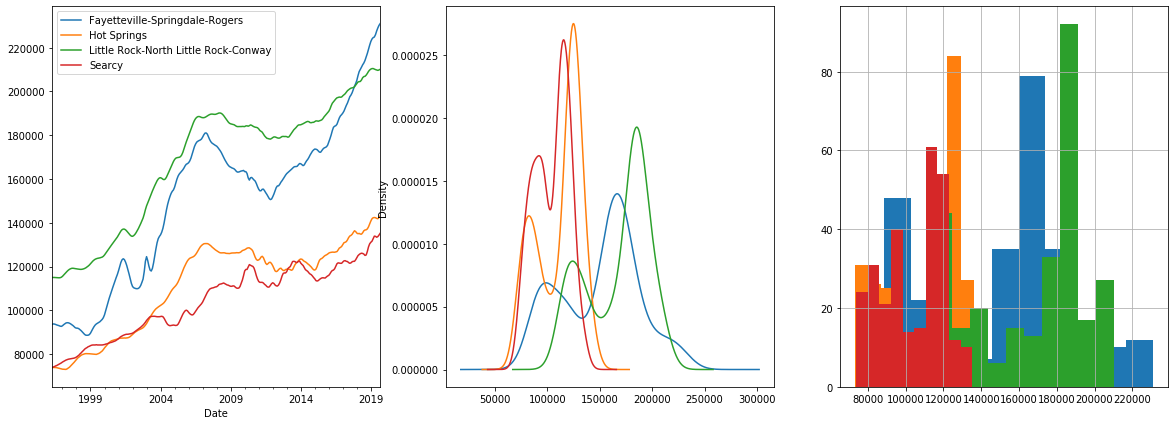

In [7]:
plt.figure(figsize =[20,7])

for item in range(Zip_Zhvi_AR_Mean_tall.shape[1]):
    plt.subplot(131)
    Zip_Zhvi_AR_Mean_tall.iloc[:,item].plot(label=Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name)  
    plt.legend()
    plt.subplot(132)
    Zip_Zhvi_AR_Mean_tall.iloc[:,item].plot(kind='kde',label=Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name)  
    plt.subplot(133)
    Zip_Zhvi_AR_Mean_tall.iloc[:,item].hist(label=Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name)  


In [8]:
Zip_Zhvi_AR_Mean_tall.iloc[-81:,0].sort_index(ascending=False)

Date
2019-09-01    230966.666667
2019-08-01    230166.666667
2019-07-01    229000.000000
2019-06-01    227600.000000
2019-05-01    225933.333333
                  ...      
2013-05-01    164400.000000
2013-04-01    163833.333333
2013-03-01    163366.666667
2013-02-01    162933.333333
2013-01-01    162466.666667
Name: Fayetteville-Springdale-Rogers, Length: 81, dtype: float64

In [9]:
groups =  Zip_Zhvi_AR_Mean_tall.iloc[-81:-9,0].sort_index(ascending=False).groupby(Grouper(freq='A'))
#for item in groups:
#    print(item)

Fayetteville-Springdale-Rogers


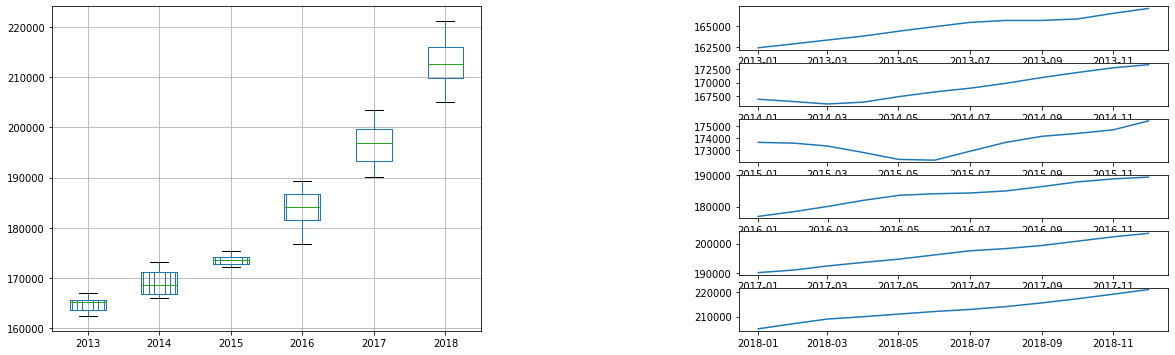

Hot Springs


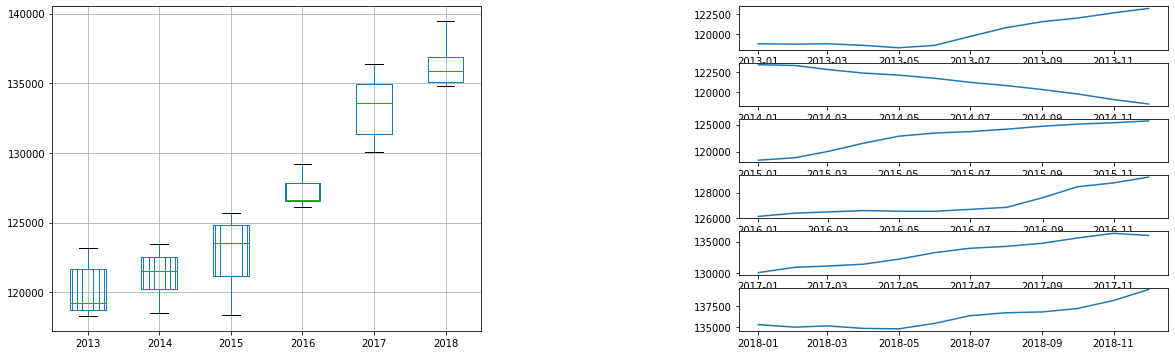

Little Rock-North Little Rock-Conway


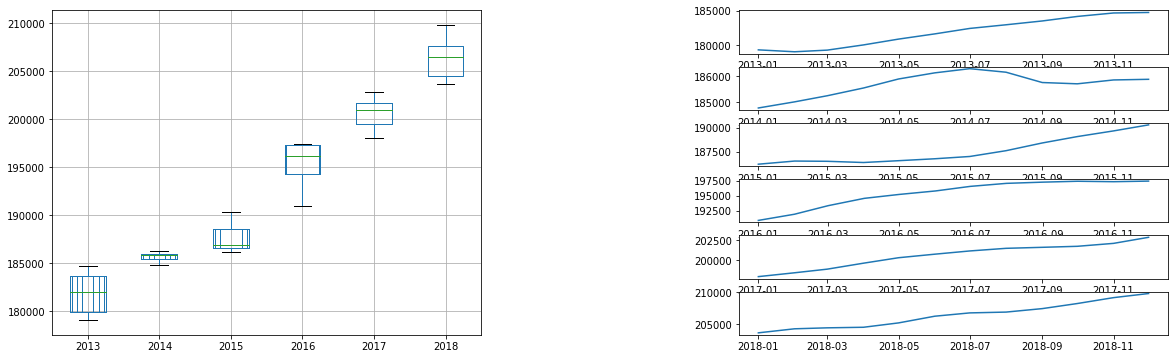

Searcy


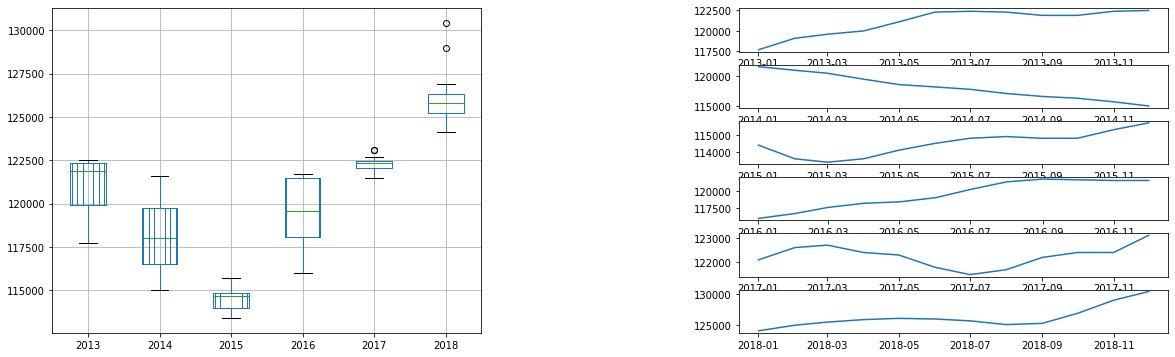

In [10]:
for item in range(Zip_Zhvi_AR_Mean_tall.shape[1]):
    print(Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name)
    groups =  Zip_Zhvi_AR_Mean_tall.iloc[-81:-9,item].groupby(Grouper(freq='A'))
    years = DataFrame()
    #pyplot.show()
    #pyplot.figure()
    i = 0
    n_groups = len(groups)
   
    plt.figure(figsize =[20,7])
    grid = plt.GridSpec(7, 2, wspace=0.6, hspace=0.3)
    for name, group in groups:
        plt.subplot(grid[i, 1])
        plt.plot(group)
        plt.subplot(grid[:6,0])
        years[name.year] = group.values
        years.boxplot()
        plt.xticks(np.arange(1, 7, step=1))
        i += 1
    plt.show()


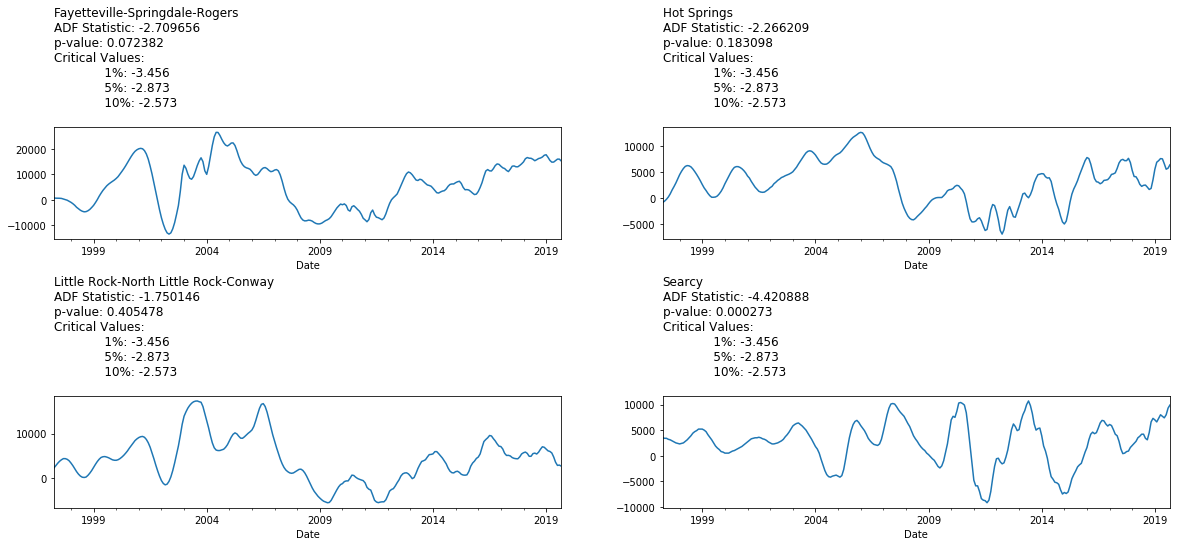

In [11]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

plt.figure(figsize =[20,7])
for item in range(Zip_Zhvi_AR_Mean_tall.shape[1]):
    if item <2:
        plt.subplot(3,2,item+1)
    else:
        plt.subplot(3,2,item+1+2)
    #print(Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name)
    X = Zip_Zhvi_AR_Mean_tall.iloc[:,item].values
    X = X.astype('float32')
    # difference data
    months_in_year = 12
    stationary = difference(X, months_in_year)
    stationary.index = Zip_Zhvi_AR_Mean_tall.iloc[:,item].index[months_in_year:]
    # check if stationary
    result = adfuller(stationary)
    #print('ADF Statistic: %f' % result[0])
    #print('p-value: %f' % result[1])
    #print('Critical Values:')
    #for key, value in result[4].items():
    #   print('\t%s: %.3f' % (key, value))
    # save
    stationary.to_csv('stationary.csv')
    # plot
    stationary.plot()
    plt.title(Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name+'\n'+'ADF Statistic: %f' % result[0]+'\n'\
             'p-value: %f' % result[1] + '\n'+ 'Critical Values:\n' +\
              ''.join(['             %s: %.3f \n' % (key, value) for key, value in result[4].items()]),loc='left')

plt.show()

In [12]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

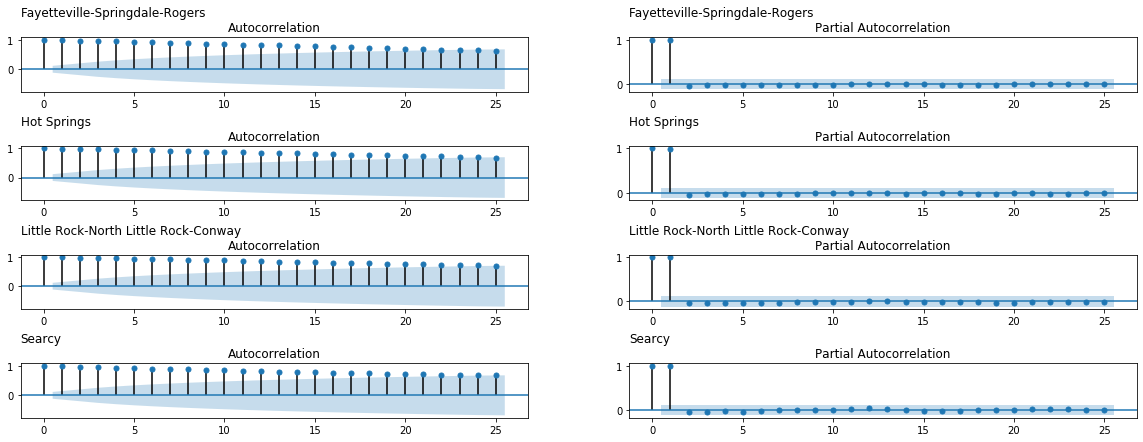

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize =[20,7])
i=1
for item in range(Zip_Zhvi_AR_Mean_tall.shape[1]):
    
    plt.subplot(4,2,item+i)
    plot_acf(Zip_Zhvi_AR_Mean_tall.iloc[:,item], ax=plt.gca())
    plt.title(Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name+'\n',loc='left')
    plt.subplot(4,2,item+i+1)
    plot_pacf(Zip_Zhvi_AR_Mean_tall.iloc[:,item], ax=plt.gca())
    plt.title(Zip_Zhvi_AR_Mean_tall.iloc[-83:-9,item].name+'\n',loc='left')
    i+=1
plt.subplots_adjust(hspace=1)
plt.show()

In [14]:
# CREATE TRAIN-TEST DATA

dataset, validation = Zip_Zhvi_AR_Mean_tall[(Zip_Zhvi_AR_Mean_tall.index>='1997-01-01') & (Zip_Zhvi_AR_Mean_tall.index<'2018-01-01')]\
, Zip_Zhvi_AR_Mean_tall[ (Zip_Zhvi_AR_Mean_tall.index>='2018-01-01') & (Zip_Zhvi_AR_Mean_tall.index<'2019-01-01')]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 252, Validation 12


In [15]:
item=0
#for item in range(dataset.shape[1]):
    # prepare data
X = dataset.iloc[:,item].values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    weeks_in_year = 52
    diff = difference(history, weeks_in_year)
    # predict
    model = ARIMA(diff, order=(2,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, weeks_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=179542.985, Expected=178000
>Predicted=177437.440, Expected=177033
>Predicted=177035.952, Expected=176400
>Predicted=176780.260, Expected=176033
>Predicted=176532.908, Expected=175700
>Predicted=175888.766, Expected=175300
>Predicted=175369.531, Expected=175000
>Predicted=175207.668, Expected=174400
>Predicted=173766.114, Expected=173700
>Predicted=173231.888, Expected=172933
>Predicted=172881.901, Expected=172067
>Predicted=172085.783, Expected=170933
>Predicted=170400.745, Expected=169867
>Predicted=169805.002, Expected=168800
>Predicted=168509.815, Expected=167867
>Predicted=167504.108, Expected=166967
>Predicted=166346.691, Expected=166233
>Predicted=166021.632, Expected=165667
>Predicted=165669.169, Expected=165400
>Predicted=165656.043, Expected=165067
>Predicted=164691.925, Expected=164867
>Predicted=164919.559, Expected=164600
>Predicted=165295.159, Expected=164067
>Predicted=163902.979, Expected=163400
>Predicted=162661.424, Expected=163133
>Predicted=163123.791, Ex

In [16]:
# CODE RUNS LONG FOR EVALUATION - approximately 

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        weeks_in_year = 52
        diff = difference(history, weeks_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, weeks_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    model_perf={'p_values':[],'d_values':[],'q_values':[],'mse':[]}
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    model_perf['p_values'].append(p)
                    model_perf['d_values'].append(d)
                    model_perf['q_values'].append(q)
                    model_perf['mse'].append(mse)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return model_perf

p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")


Fayetteville_model_perf=evaluate_models(dataset.iloc[:,0].values, p_values, d_values, q_values)
HotSprings_model_perf=evaluate_models(dataset.iloc[:,1].values, p_values, d_values, q_values)
LittleRock_model_perf=evaluate_models(dataset.iloc[:,2].values, p_values, d_values, q_values)
Searcy_model_perf=evaluate_models(dataset.iloc[:,3].values, p_values, d_values, q_values)


ARIMA(0, 1, 1) RMSE=941.535
ARIMA(0, 2, 1) RMSE=611.970
ARIMA(1, 1, 0) RMSE=649.378
ARIMA(1, 1, 2) RMSE=617.768
ARIMA(1, 1, 3) RMSE=589.769
ARIMA(1, 2, 0) RMSE=645.333
ARIMA(1, 2, 1) RMSE=630.915
ARIMA(2, 1, 0) RMSE=641.561
ARIMA(2, 1, 1) RMSE=615.212
ARIMA(2, 1, 2) RMSE=588.622
ARIMA(2, 2, 0) RMSE=625.696
ARIMA(2, 2, 1) RMSE=631.356
ARIMA(2, 2, 2) RMSE=613.672
ARIMA(3, 1, 0) RMSE=613.143
ARIMA(3, 1, 1) RMSE=614.405
ARIMA(3, 1, 2) RMSE=610.783
ARIMA(3, 2, 0) RMSE=633.472
ARIMA(3, 2, 1) RMSE=634.762
ARIMA(4, 1, 1) RMSE=621.536
ARIMA(4, 1, 2) RMSE=618.485
ARIMA(4, 2, 0) RMSE=611.747
ARIMA(4, 2, 1) RMSE=598.107
ARIMA(4, 2, 2) RMSE=598.953
ARIMA(4, 2, 3) RMSE=595.875
ARIMA(5, 1, 1) RMSE=608.230
ARIMA(5, 2, 0) RMSE=597.608
ARIMA(5, 2, 1) RMSE=587.425
ARIMA(6, 2, 0) RMSE=600.213
ARIMA(6, 2, 1) RMSE=590.840
Best ARIMA(5, 2, 1) RMSE=587.425
ARIMA(0, 1, 1) RMSE=533.041
ARIMA(0, 2, 1) RMSE=383.638
ARIMA(0, 2, 3) RMSE=372.613
ARIMA(0, 2, 5) RMSE=362.614
ARIMA(0, 2, 6) RMSE=365.010
ARIMA(1, 1, 0) 

In [17]:
# save the results into a file for later use
pd.DataFrame(Fayetteville_model_perf).to_csv('Fayetteville_model_perf.csv')
pd.DataFrame(HotSprings_model_perf).to_csv('HotSprings_model_perf.csv')
pd.DataFrame(LittleRock_model_perf).to_csv('LittleRock_model_perf.csv')
pd.DataFrame(Searcy_model_perf).to_csv('Searcy_model_perf.csv')

In [18]:
# Load the results from the saved file
Fayetteville_model_perf=pd.read_csv('Fayetteville_model_perf.csv').iloc[:,1:5]
HotSprings_model_perf=pd.read_csv('HotSprings_model_perf.csv').iloc[:,1:5]
LittleRock_model_perf=pd.read_csv('LittleRock_model_perf.csv').iloc[:,1:5]
Searcy_model_perf=pd.read_csv('Searcy_model_perf.csv').iloc[:,1:5]

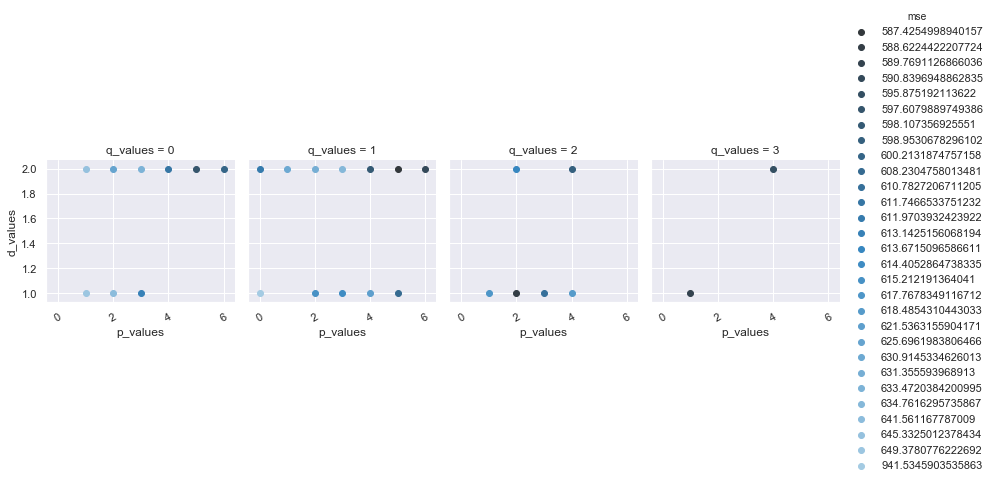

In [19]:
# compare the mse results in a scatter plot for Fayetteville
sns.set(style="darkgrid")
g = sns.FacetGrid(Fayetteville_model_perf, col="q_values", col_wrap=4,hue="mse",palette="Blues_d")
g.map(plt.scatter, "p_values", "d_values", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

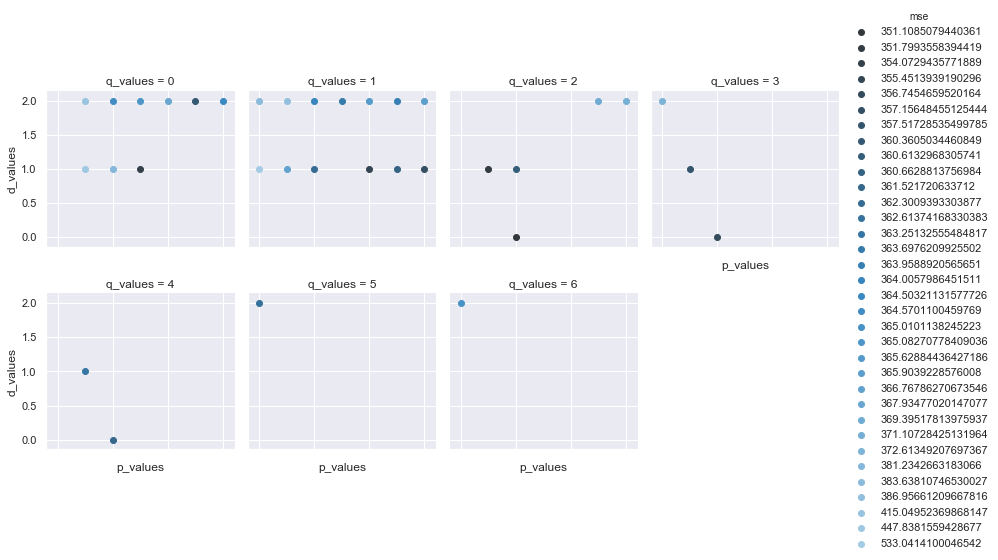

In [20]:
# compare the mse results in a scatter plot for HotSprings
sns.set(style="darkgrid")
g = sns.FacetGrid(HotSprings_model_perf, col="q_values", col_wrap=4,hue="mse",palette="Blues_d")
g.map(plt.scatter, "p_values", "d_values", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

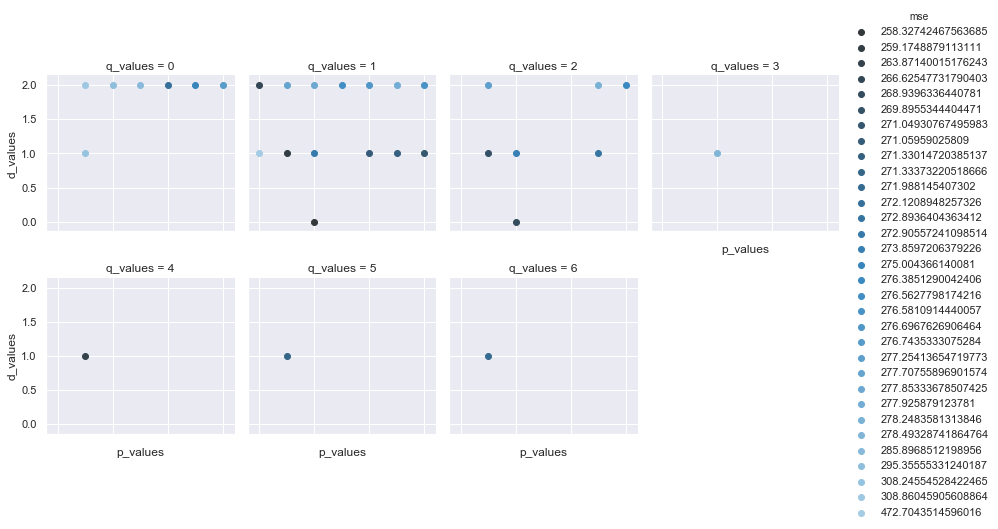

In [21]:
# compare the mse results in a scatter plot for LittleRock
sns.set(style="darkgrid")
g = sns.FacetGrid(LittleRock_model_perf, col="q_values", col_wrap=4,hue="mse",palette="Blues_d")
g.map(plt.scatter, "p_values", "d_values", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

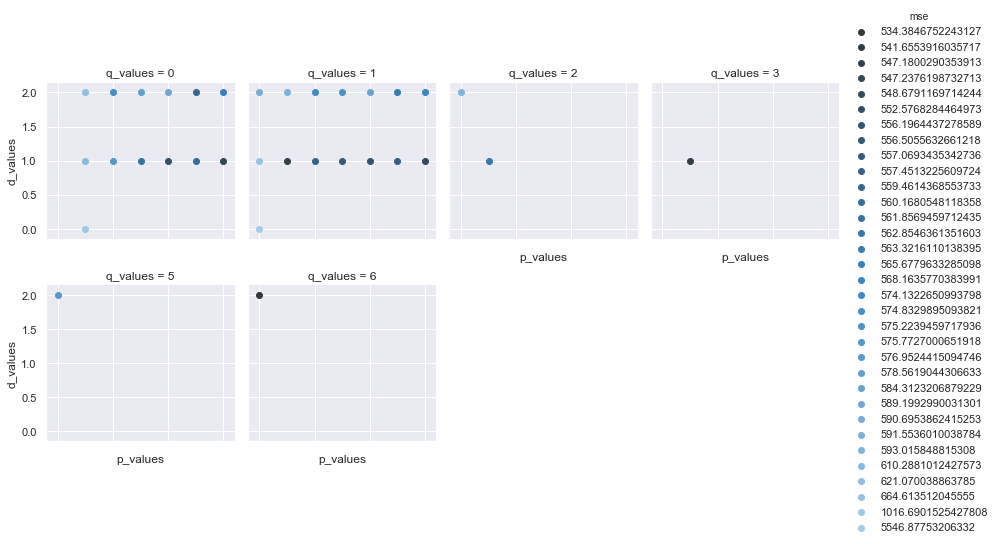

In [22]:
# compare the mse results in a scatter plot for Searcy
sns.set(style="darkgrid")
g = sns.FacetGrid(Searcy_model_perf, col="q_values", col_wrap=4,hue="mse",palette="Blues_d")
g.map(plt.scatter, "p_values", "d_values", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

## Best ARIMA model for Fayetteville, HotSprings, LittleRock and Searcy are as follows
#### Fayetteville: Best ARIMA(5, 2, 1) RMSE=587.425
#### HotSprings: Best ARIMA(2, 0, 2) RMSE=351.109
#### LittleRock: Best ARIMA(2, 0, 1) RMSE=258.327
#### Searcy: Best ARIMA(0, 2, 6) RMSE=534.385

In [23]:
Zip_Zhvi_SingleFamilyResidence_df.melt(id_vars =['RegionID', 'RegionName','City','State','Metro','CountyName','SizeRank']).head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-04,337200.0
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,1996-04,210400.0
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1996-04,502900.0
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1996-04,95400.0
4,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,5,1996-04,95000.0


In [24]:
Zip_Zhvi_SingleFamilyResidence_avg_mean_df=Zip_Zhvi_SingleFamilyResidence_df.melt(id_vars =['RegionID', 'RegionName','City','State','Metro','CountyName','SizeRank'])
Zip_Zhvi_SingleFamilyResidence_avg_mean_df['year']=pd.to_datetime(Zip_Zhvi_SingleFamilyResidence_avg_mean_df['variable']).dt.year
Zip_Zhvi_SingleFamilyResidence_avg_mean_df=Zip_Zhvi_SingleFamilyResidence_avg_mean_df.groupby(['RegionID', 'RegionName','City','State','Metro','CountyName','SizeRank','year']).mean()
Zip_Zhvi_SingleFamilyResidence_avg_mean_df=Zip_Zhvi_SingleFamilyResidence_avg_mean_df.reset_index()

In [25]:
Zip_Zhvi_SingleFamilyResidence_avg_mean_df.iloc[:,1:].head()

,RegionName,City,State,Metro,CountyName,SizeRank,year,value
0,1001,Agawam,MA,Springfield,Hampden County,5987,1996,110677.777778
1,1001,Agawam,MA,Springfield,Hampden County,5987,1997,113433.333333
2,1001,Agawam,MA,Springfield,Hampden County,5987,1998,116541.666667
3,1001,Agawam,MA,Springfield,Hampden County,5987,1999,120150.000000
4,1001,Agawam,MA,Springfield,Hampden County,5987,2000,126225.000000


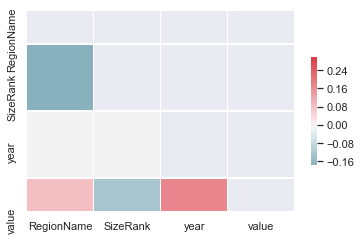

In [26]:
# Take a look at the correlations between all dependent variable

corr = Zip_Zhvi_SingleFamilyResidence_avg_mean_df.iloc[:,1:].corr()
#corr = model_df.loc[:, model_df.columns != 'runiform'].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [27]:
Zip_Zhvi_SingleFamilyResidence_avg_mean_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year,value
0,58196,1001,Agawam,MA,Springfield,Hampden County,5987,1996,110677.777778
1,58196,1001,Agawam,MA,Springfield,Hampden County,5987,1997,113433.333333
2,58196,1001,Agawam,MA,Springfield,Hampden County,5987,1998,116541.666667
3,58196,1001,Agawam,MA,Springfield,Hampden County,5987,1999,120150.000000
4,58196,1001,Agawam,MA,Springfield,Hampden County,5987,2000,126225.000000


In [28]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#model_df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(model_df))
model_df_train = Zip_Zhvi_SingleFamilyResidence_avg_mean_df[Zip_Zhvi_SingleFamilyResidence_avg_mean_df['year']<=2017].iloc[:,1:]
model_df_test = Zip_Zhvi_SingleFamilyResidence_avg_mean_df[Zip_Zhvi_SingleFamilyResidence_avg_mean_df['year']==2018].iloc[:,1:]
# check training data frame
print('\nfiltered_coaches_train data frame (rows, columns): ',model_df_train.shape)
print(model_df_train.head())
# check test data frame
print('\nfiltered_coaches_test data frame (rows, columns): ',model_df_test.shape)
print(model_df_test.head())
 


filtered_coaches_train data frame (rows, columns):  (312972, 8)
   RegionName    City State        Metro      CountyName  SizeRank  year  \
0        1001  Agawam    MA  Springfield  Hampden County      5987  1996   
1        1001  Agawam    MA  Springfield  Hampden County      5987  1997   
2        1001  Agawam    MA  Springfield  Hampden County      5987  1998   
3        1001  Agawam    MA  Springfield  Hampden County      5987  1999   
4        1001  Agawam    MA  Springfield  Hampden County      5987  2000   

           value  
0  110677.777778  
1  113433.333333  
2  116541.666667  
3  120150.000000  
4  126225.000000  

filtered_coaches_test data frame (rows, columns):  (14226, 8)
     RegionName         City State        Metro        CountyName  SizeRank  \
22         1001       Agawam    MA  Springfield    Hampden County      5987   
46         1002      Amherst    MA  Springfield  Hampshire County      4191   
70         1005        Barre    MA    Worcester  Worcester Count

In [29]:
# countplot for RegionName  
temp=pd.DataFrame(model_df_train.loc[:,'City']).groupby(['City']).count()[1:]
temp=temp.reset_index()
temp['cnt']=1
temp.to_csv('temp1.csv')
temp=pd.DataFrame(model_df_train.loc[:,'State']).groupby(['State']).count()[1:]
temp=temp.reset_index()
temp['cnt']=1
temp.to_csv('temp2.csv')
temp=pd.DataFrame(model_df_train.loc[:,'Metro']).groupby(['Metro']).count()[1:]
temp=temp.reset_index()
temp['cnt']=1
temp.to_csv('temp3.csv')
temp=pd.DataFrame(model_df_train.loc[:,'CountyName']).groupby(['CountyName']).count()[1:]
temp=temp.reset_index()
temp['cnt']=1
temp.to_csv('temp4.csv')
temp=pd.DataFrame(model_df_train.loc[:,'RegionName']).groupby(['RegionName']).count()[1:]
temp=temp.reset_index()
temp['cnt']=1
temp.to_csv('temp5.csv')


In [30]:
# specify a model 
my_model = str('value ~  RegionName + State+ Metro+CountyName+ SizeRank+ year')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = model_df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
model_df_train['predicted_value'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
model_df_test['predicted_value'] = train_model_fit.predict(model_df_test)

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:59:37   Log-Likelihood:            -4.0539e+06
No. Observations:              300830   AIC:                         8.111e+06
Df Residuals:                  299355   BIC:                         8.126e+06
Df Model:                        1474                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [31]:
model_df_test.head()

,RegionName,City,State,Metro,CountyName,SizeRank,year,value,predicted_value
22,1001,Agawam,MA,Springfield,Hampden County,5987,2018,225050.000000,232073.863503
46,1002,Amherst,MA,Springfield,Hampshire County,4191,2018,362191.666667,267847.784431
70,1005,Barre,MA,Worcester,Worcester County,11574,2018,225375.000000,337170.146874
94,1007,Belchertown,MA,Springfield,Hampshire County,6875,2018,275758.333333,274897.223903
118,1008,Blandford,MA,Springfield,Hampden County,15491,2018,218958.333333,257625.593531


In [32]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(model_df_test['value'].corr(model_df_test['predicted_value']),2),3))


Proportion of Test Set Variance Accounted for:  0.541


In [33]:
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r=Zip_Zhvi_SingleFamilyResidence_avg_mean_df.copy()
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r=Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.sort_values(by=['RegionName','year'],ascending=False, na_position='first')
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r=Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.reset_index().iloc[:,1:]
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['log_return'] = np.log(Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['value']/Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['value'].shift(-1)) 
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.loc[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.year == 1996, 'log_return']=None
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['previous_value'] = Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['value'].shift(-1)
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.loc[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.year == 1996, 'previous_value']=None
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.head(50)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year,value,log_return,previous_value
0,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2019,312577.777778,0.023122,305433.333333
1,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2018,305433.333333,0.065740,286000.000000
2,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2017,286000.000000,0.017667,280991.666667
3,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2016,280991.666667,0.026110,273750.000000
4,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2015,273750.000000,0.040663,262841.666667
5,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2014,262841.666667,0.018754,257958.333333
6,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2013,257958.333333,0.030338,250250.000000
7,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2012,250250.000000,0.011050,247500.000000
8,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2011,247500.000000,0.010527,244908.333333
9,100478,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2010,244908.333333,-0.001224,245208.333333


In [34]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#model_df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(model_df))
model_df_train = Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['year']<=2017].iloc[:,1:]
model_df_test = Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r['year']==2018].iloc[:,1:]
# check training data frame
print('\nfiltered_coaches_train data frame (rows, columns): ',model_df_train.shape)
print(model_df_train.head())
# check test data frame
print('\nfiltered_coaches_test data frame (rows, columns): ',model_df_test.shape)
print(model_df_test.head())


filtered_coaches_train data frame (rows, columns):  (312972, 10)
   RegionName       City State      Metro                 CountyName  \
2       99901  Ketchikan    AK  Ketchikan  Ketchikan Gateway Borough   
3       99901  Ketchikan    AK  Ketchikan  Ketchikan Gateway Borough   
4       99901  Ketchikan    AK  Ketchikan  Ketchikan Gateway Borough   
5       99901  Ketchikan    AK  Ketchikan  Ketchikan Gateway Borough   
6       99901  Ketchikan    AK  Ketchikan  Ketchikan Gateway Borough   

   SizeRank  year          value  log_return  previous_value  
2      7426  2017  286000.000000    0.017667   280991.666667  
3      7426  2016  280991.666667    0.026110   273750.000000  
4      7426  2015  273750.000000    0.040663   262841.666667  
5      7426  2014  262841.666667    0.018754   257958.333333  
6      7426  2013  257958.333333    0.030338   250250.000000  

filtered_coaches_test data frame (rows, columns):  (14226, 10)
    RegionName        City State      Metro                

In [35]:
# specify a model 
my_model = str('value ~  RegionName + State+ Metro+ SizeRank+ year  + previous_value')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = model_df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
model_df_train['predicted_value'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
model_df_test['predicted_value'] = train_model_fit.predict(model_df_test)

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.449e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:00:53   Log-Likelihood:            -3.3450e+06
No. Observations:              286604   AIC:                         6.692e+06
Df Residuals:                  285766   BIC:                         6.700e+06
Df Model:                         837                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [36]:
model_df_test.head()

,RegionName,City,State,Metro,CountyName,SizeRank,year,value,log_return,previous_value,predicted_value
1,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2018,305433.333333,0.065740,286000.000000,292158.117335
25,99801,Juneau,AK,Juneau,Juneau Borough,4099,2018,411858.333333,0.032805,398566.666667,409565.191590
49,99712,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,8582,2018,277475.000000,0.032042,268725.000000,273464.381814
73,99709,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,4582,2018,266208.333333,0.022797,260208.333333,264835.854380
97,99705,North Pole,AK,Fairbanks,Fairbanks North Star Borough,5507,2018,264775.000000,0.026987,257725.000000,262205.821437


In [37]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(model_df_test['value'].corr(model_df_test['predicted_value']),2),3))


Proportion of Test Set Variance Accounted for:  0.995


In [38]:
frames = [model_df_train, model_df_test]
result_df=pd.concat(frames)
result_df=result_df.sort_values(by=['RegionName','year'],ascending=False, na_position='first')
result_df=result_df.reset_index(drop=True)
result_df['predicted_log_return'] = np.log(result_df['predicted_value']/result_df['predicted_value'].shift(-1))
result_df

,RegionName,City,State,Metro,CountyName,SizeRank,year,value,log_return,previous_value,predicted_value,predicted_log_return
0,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2018,305433.333333,0.065740,286000.000000,292158.117335,0.016442
1,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2017,286000.000000,0.017667,280991.666667,287393.588836,0.024969
2,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2016,280991.666667,0.026110,273750.000000,280306.416433,0.039664
3,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2015,273750.000000,0.040663,262841.666667,269405.948070,0.017352
4,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway Borough,7426,2014,262841.666667,0.018754,257958.333333,264771.418296,0.029017
...,...,...,...,...,...,...,...,...,...,...,...,...
327193,1001,Agawam,MA,Springfield,Hampden County,5987,2000,126225.000000,0.049325,120150.000000,126558.100470,0.026490
327194,1001,Agawam,MA,Springfield,Hampden County,5987,1999,120150.000000,0.030492,116541.666667,123249.557700,0.022885
327195,1001,Agawam,MA,Springfield,Hampden County,5987,1998,116541.666667,0.027034,113433.333333,120461.009835,0.020308
327196,1001,Agawam,MA,Springfield,Hampden County,5987,1997,113433.333333,0.024592,110677.777778,118039.347263,NaN


In [39]:
result_df_nlargest=result_df.groupby('year').apply(lambda grp: grp.nlargest(10, ['predicted_log_return'])).reset_index(drop=True).sort_values(by=['year','predicted_log_return'],ascending=False)

In [40]:
result_df_nlargest['cnt']=1
n_occurence=result_df_nlargest.loc[:,['RegionName','cnt']].groupby('RegionName').sum()

<Figure size 1440x504 with 0 Axes>

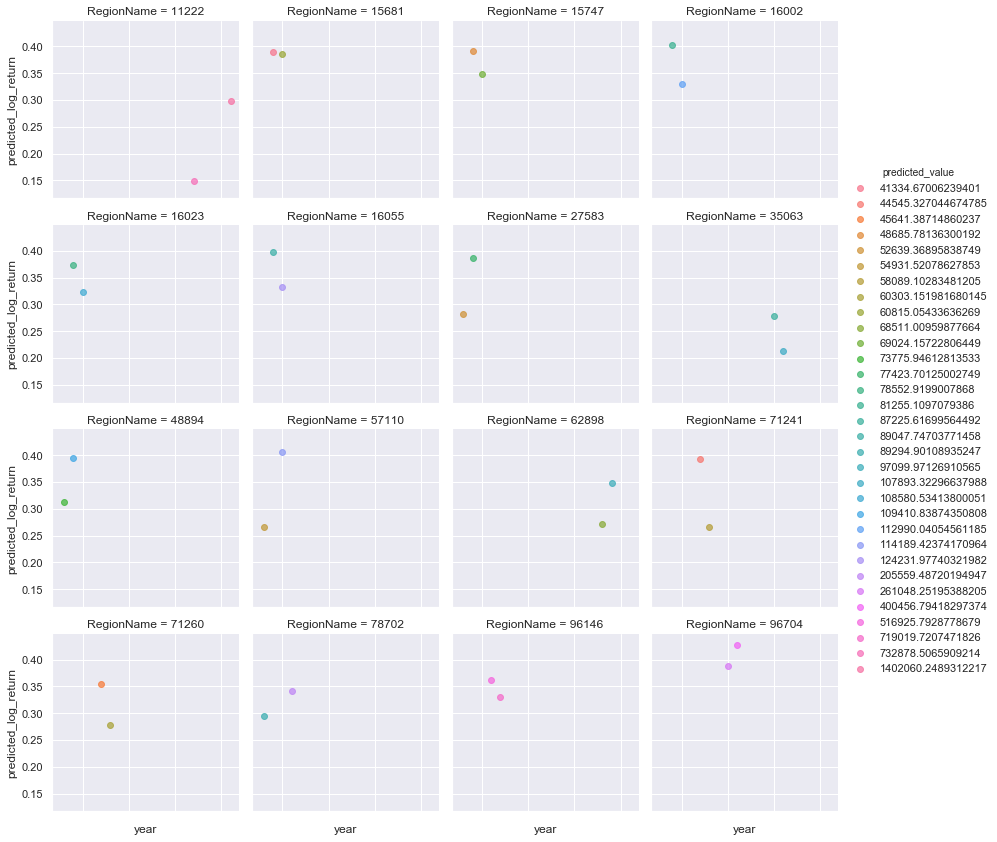

In [41]:
plt.figure(figsize =[20,7])
sns.set(style="darkgrid")
g = sns.FacetGrid(result_df_nlargest[result_df_nlargest['RegionName'].isin(n_occurence[n_occurence.cnt>1].index)], col="RegionName", col_wrap=4,hue="predicted_value")
g.map(plt.scatter, "year", "predicted_log_return", alpha=.7)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

Text(0, 0.5, 'Predicted Log return')

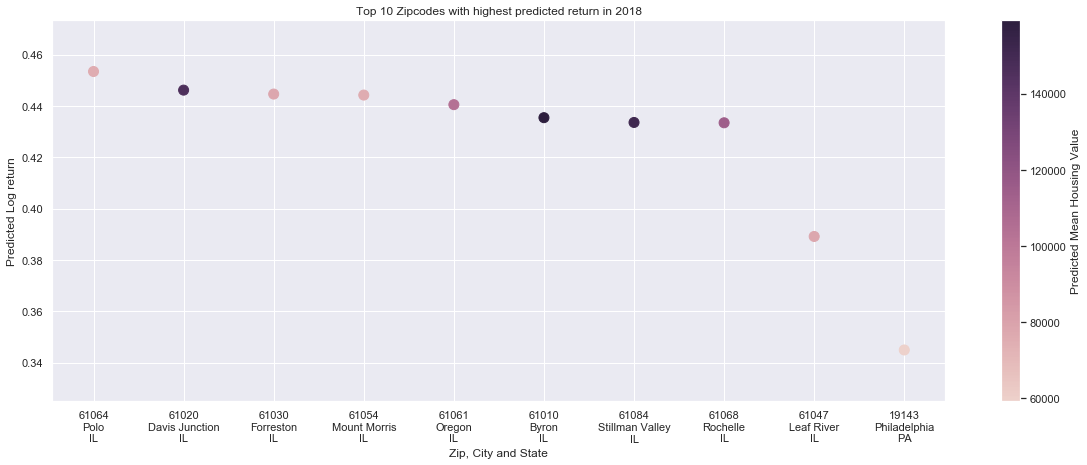

In [42]:
model_df_test_nlargest=result_df.loc[result_df.year==2018,:].nlargest(10, ['predicted_log_return'])
model_df_test_nlargest['RegionName']=model_df_test_nlargest['RegionName'].astype(str)+'\n'+model_df_test_nlargest['City']+'\n'+model_df_test_nlargest['State']
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize =[20,7])
points = ax.scatter(model_df_test_nlargest.RegionName,model_df_test_nlargest.predicted_log_return,c=model_df_test_nlargest.predicted_value, s=100, cmap=cmap)
f.colorbar(points, label='Predicted Mean Housing Value')
ax.set_title("Top 10 Zipcodes with highest predicted return in 2018")
ax.set_xlabel("Zip, City and State")
ax.set_ylabel("Predicted Log return")


In [43]:
model_df_test_nlargest.iloc[:3,]

,RegionName,City,State,Metro,CountyName,SizeRank,year,value,log_return,previous_value,predicted_value,predicted_log_return
108859,61064\nPolo\nIL,Polo,IL,Rochelle,Ogle County,12303,2018,81083.333333,-0.013069,82150.0,75972.815547,0.453430
109043,61020\nDavis Junction\nIL,Davis Junction,IL,Rochelle,Ogle County,13597,2018,147516.666667,-0.014358,149650.0,146150.829194,0.446178
108997,61030\nForreston\nIL,Forreston,IL,Rochelle,Ogle County,14252,2018,83808.333333,-0.011468,84775.0,78632.896214,0.444642


In [44]:
import glob
import os
file_lst=(glob.glob((os.getcwd()+"\\ThulasiRam_RuppaKrishnan_Lab2\\la\\*.txt")))


In [45]:
la_dict={}
attribute_list=[]

for ix,file in enumerate(file_lst):
    print(file)
    cnt=0
    with open(file,'r') as in_file:
        for idx,line in enumerate(in_file):
            if (idx==0) and (ix==0):
                for attribute in line.split():
                    if attribute=='footnote_codes':
                        pass
                    else:
                        attribute_list.append(attribute)
                        la_dict[attribute]=[]
            else:
                if (line.split()[0].endswith('03',18,20)) and (line.split()[0].startswith('LASST')) and (int(line.split()[1])>=1996) and (int(line.split()[1])<2019):
                    la_dict[attribute_list[0]].append(line.split()[0])
                    la_dict[attribute_list[1]].append(line.split()[1])
                    la_dict[attribute_list[2]].append(line.split()[2])
                    la_dict[attribute_list[3]].append(float(line.split()[3].strip().replace('-','0').replace('','0')))
                    cnt+=1
        print('Number of records {}'.format(cnt))
    in_file.close()


C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.10.Arkansas.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.11.California.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.12.Colorado.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.13.Connecticut.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.14.Delaware.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.15.DC.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\la.data.16.Florida.txt
Number of records 276
C:\Users\rkrishnan\Documents\01 Personal\MS\IST 718\ThulasiRam_RuppaKrishnan_Lab2\la\

In [46]:
attribute_list

['series_id', 'year', 'period', 'value']

In [47]:
for attribute in attribute_list:
    print('Length of attribute {} list is {}'.format(attribute,len(la_dict[attribute])))

Length of attribute series_id list is 14352
Length of attribute year list is 14352
Length of attribute period list is 14352
Length of attribute value list is 14352


In [49]:
#la_dict_df['value']=la_dict_df['value']/10
la_dict_df=pd.DataFrame(la_dict)
la_dict_df['value']=la_dict_df['value']/10
la_dict_df['value']=la_dict_df['value'].apply(lambda x: (x/10) if x>10 else x)
la_dict_df.to_csv('la_dict_df.csv')
la_dict_df['value']=la_dict_df['value'].astype(float)

In [ ]:
#la_dict_df['value']=la_dict_df['value'].apply(lambda x: str(x).replace('','0'))
#la_dict_df.iloc[698109,3]

In [50]:
#la_dict_df['value']=la_dict_df['value'].astype(float)
la_dict_df=la_dict_df.groupby(['series_id','year']).mean().reset_index()
la_dict_df['s_code']=la_dict_df['series_id'].str[5:7]

In [51]:
meta_dict={}
meta_attribute_list=[]
file='ThulasiRam_RuppaKrishnan_Lab2\\la.series.txt'
cnt=0
with open(file,'r') as in_file:
    for idx,line in enumerate(in_file):
        if (idx==0):
            for attribute in line.split('\t'):
                    meta_attribute_list.append(attribute.strip())
                    meta_dict[attribute.strip()]=[]
        else:
                meta_dict[meta_attribute_list[0]].append(line.split('\t')[0].strip())
                meta_dict[meta_attribute_list[1]].append(line.split('\t')[1].strip())
                meta_dict[meta_attribute_list[2]].append(line.split('\t')[2].strip())
                meta_dict[meta_attribute_list[3]].append(line.split('\t')[3].strip())
                meta_dict[meta_attribute_list[4]].append(line.split('\t')[4].strip())
                meta_dict[meta_attribute_list[5]].append(line.split('\t')[5].strip())
                meta_dict[meta_attribute_list[6]].append(line.split('\t')[6].strip())
                meta_dict[meta_attribute_list[7]].append(line.split('\t')[7].strip())
                meta_dict[meta_attribute_list[8]].append(line.split('\t')[8].strip())
                meta_dict[meta_attribute_list[9]].append(line.split('\t')[9].strip())
                meta_dict[meta_attribute_list[10]].append(line.split('\t')[10].strip())
                meta_dict[meta_attribute_list[11]].append(line.split('\t')[11].strip())
                cnt+=1
    print('Number of records {}'.format(cnt))
    in_file.close()
meta_dict_df=pd.DataFrame(meta_dict)
meta_dict_df=meta_dict_df[meta_dict_df['series_id'].apply(lambda x: x.endswith('03',18,20))]

Number of records 33476


In [52]:
state_dict={}
state_attribute_list=[]
file='ThulasiRam_RuppaKrishnan_Lab2\\la.state_region_division.txt'
cnt=0
with open(file,'r') as in_file:
    for idx,line in enumerate(in_file):
        if (idx==0):
            for attribute in line.split('\t'):
                    state_attribute_list.append(attribute.strip())
                    state_dict[attribute.strip()]=[]
        else:
                state_dict[state_attribute_list[0]].append(line.split('\t')[0].strip())
                state_dict[state_attribute_list[1]].append(line.split('\t')[1].strip())
                cnt+=1
    print('Number of records {}'.format(cnt))
    in_file.close()
state_dict_df=pd.DataFrame(state_dict)

Number of records 53


In [53]:
state_cd={}
state_cd_list=[]
file='ThulasiRam_RuppaKrishnan_Lab2\\states.csv'
cnt=0
with open(file,'r') as in_file:
    file_reader=csv.reader(in_file,dialect='excel',delimiter=',')
    for idx,line in enumerate(file_reader):
        
        if idx==0:
            for attribute in line:
                state_cd_list.append(attribute)
                state_cd[attribute]=[]
        else:
            for ix,value in enumerate(line):
                state_cd[state_cd_list[ix]]=state_cd[state_cd_list[ix]]+[value]

                cnt+=1
    print('Number of records {}'.format(cnt))
    in_file.close()
state_cd_df=pd.DataFrame(state_cd)


Number of records 102


In [54]:
result = pd.merge(la_dict_df, state_dict_df,how='inner',left_on=la_dict_df.s_code,right_on=state_dict_df.srd_code,left_index=False, right_index=False)
result=result.loc[:,['series_id','year','srd_code','srd_text','value']]
result=pd.merge(result,state_cd_df,how='inner',left_on=result.srd_text,right_on=state_cd_df.State,left_index=False, right_index=False)
result=result.loc[:,['series_id','year','srd_code','srd_text','Abbreviation','value']]
result.columns=['series_id','year_y','srd_code','srd_text','Abbreviation','u_rate']
result['year_y']=result['year_y'].astype(int)
result.dtypes
#Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.dtypes

series_id        object
year_y            int32
srd_code         object
srd_text         object
Abbreviation     object
u_rate          float64
dtype: object

In [55]:
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
#         left_index=False, right_index=False, sort=True,
#         suffixes=('_x', '_y'), copy=True, indicator=False,
#         validate=None)

Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2=pd.merge(Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r, result,how='inner', left_on=[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.State,Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r.year],right_on=[result.Abbreviation,result.year_y],left_index=False, right_index=False)
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2=Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2.loc[:,['RegionName','City','State','Metro','SizeRank','year','previous_value','log_return','u_rate','value']]
Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2.head()
#Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2=Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2.loc[:,['RegionName','City','State','Metro','SizeRank','year_x','value_x','previous_value',]]

,RegionName,City,State,Metro,SizeRank,year,previous_value,log_return,u_rate,value
0,99901,Ketchikan,AK,Ketchikan,7426,2018,286000.000000,0.065740,6.006,305433.333333
1,99801,Juneau,AK,Juneau,4099,2018,398566.666667,0.032805,6.006,411858.333333
2,99712,Fairbanks,AK,Fairbanks,8582,2018,268725.000000,0.032042,6.006,277475.000000
3,99709,Fairbanks,AK,Fairbanks,4582,2018,260208.333333,0.022797,6.006,266208.333333
4,99705,North Pole,AK,Fairbanks,5507,2018,257725.000000,0.026987,6.006,264775.000000


In [56]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#model_df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(model_df))
model_df_train = Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2['year']<=2017]
model_df_test = Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2[Zip_Zhvi_SingleFamilyResidence_avg_mean_df_r2['year']==2018]
# check training data frame
print('\nfiltered_coaches_train data frame (rows, columns): ',model_df_train.shape)
print(model_df_train.head())
# check test data frame
print('\nfiltered_coaches_test data frame (rows, columns): ',model_df_test.shape)
print(model_df_test.head())



filtered_coaches_train data frame (rows, columns):  (312972, 10)
    RegionName        City State      Metro  SizeRank  year  previous_value  \
22       99901   Ketchikan    AK  Ketchikan      7426  2017   280991.666667   
23       99801      Juneau    AK     Juneau      4099  2017   390741.666667   
24       99712   Fairbanks    AK  Fairbanks      8582  2017   259675.000000   
25       99709   Fairbanks    AK  Fairbanks      4582  2017   253591.666667   
26       99705  North Pole    AK  Fairbanks      5507  2017   250208.333333   

    log_return    u_rate          value  
22    0.017667  6.504417  286000.000000  
23    0.019828  6.504417  398566.666667  
24    0.034258  6.504417  268725.000000  
25    0.025757  6.504417  260208.333333  
26    0.029599  6.504417  257725.000000  

filtered_coaches_test data frame (rows, columns):  (14226, 10)
   RegionName        City State      Metro  SizeRank  year  previous_value  \
0       99901   Ketchikan    AK  Ketchikan      7426  2018   2860

In [57]:
# specify a model 
my_model = str('value ~  RegionName + State+ Metro+ SizeRank+ year +u_rate + previous_value')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = model_df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
model_df_train['predicted_value'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
model_df_test['predicted_value'] = train_model_fit.predict(model_df_test)

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.682e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:27:06   Log-Likelihood:            -3.3319e+06
No. Observations:              286604   AIC:                         6.666e+06
Df Residuals:                  285765   BIC:                         6.674e+06
Df Model:                         838                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [58]:

# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(model_df_test['value'].corr(model_df_test['predicted_value']),2),3))



Proportion of Test Set Variance Accounted for:  0.995


Text(0, 0.5, 'Predicted Log return')

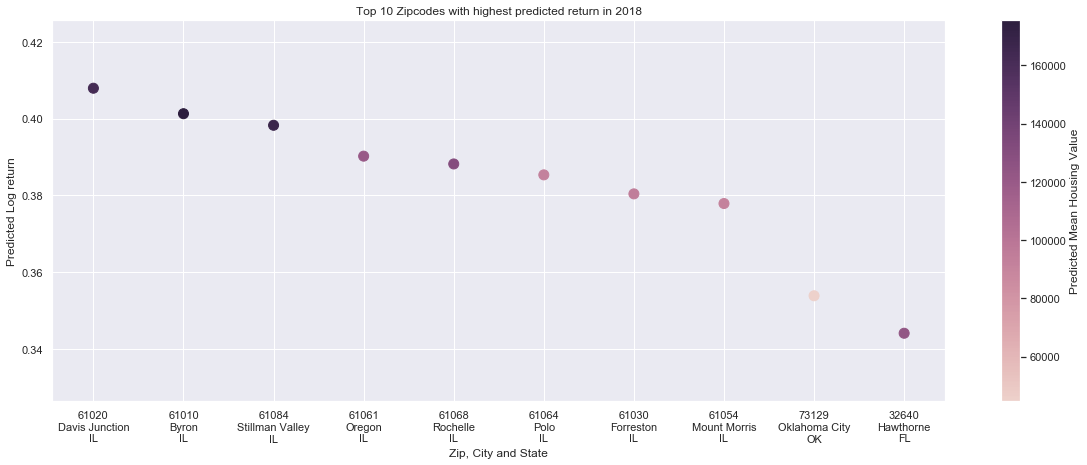

In [59]:
frames = [model_df_train, model_df_test]
result_df=pd.concat(frames)
result_df=result_df.sort_values(by=['RegionName','year'],ascending=False, na_position='first')
result_df=result_df.reset_index(drop=True)
result_df['predicted_log_return'] = np.log(result_df['predicted_value']/result_df['predicted_value'].shift(-1))
result_df_nlargest=result_df.groupby('year').apply(lambda grp: grp.nlargest(10, ['predicted_log_return'])).reset_index(drop=True).sort_values(by=['year','predicted_log_return'],ascending=False)
model_df_test_nlargest=result_df.loc[result_df.year==2018,:].nlargest(10, ['predicted_log_return'])
model_df_test_nlargest['RegionName']=model_df_test_nlargest['RegionName'].astype(str)+'\n'+model_df_test_nlargest['City']+'\n'+model_df_test_nlargest['State']
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize =[20,7])
points = ax.scatter(model_df_test_nlargest.RegionName,model_df_test_nlargest.predicted_log_return,c=model_df_test_nlargest.predicted_value, s=100, cmap=cmap)
f.colorbar(points, label='Predicted Mean Housing Value')
ax.set_title("Top 10 Zipcodes with highest predicted return in 2018")
ax.set_xlabel("Zip, City and State")
ax.set_ylabel("Predicted Log return")

In [60]:
model_df_test_nlargest.iloc[:3,]

,RegionName,City,State,Metro,SizeRank,year,previous_value,log_return,u_rate,value,predicted_value,predicted_log_return
109043,61020\nDavis Junction\nIL,Davis Junction,IL,Rochelle,13597,2018,149650.000000,-0.014358,4.002833,147516.666667,162354.916283,0.407905
109135,61010\nByron\nIL,Byron,IL,Rochelle,9726,2018,161950.000000,0.003903,4.002833,162583.333333,175372.585255,0.401271
108675,61084\nStillman Valley\nIL,Stillman Valley,IL,Rochelle,13230,2018,155358.333333,0.010405,4.002833,156983.333333,168229.345987,0.398257


In [126]:
df = model_df_test.groupby([ 'State']).mean().loc[:,'predicted_value'].reset_index()
df.head()

,State,predicted_value
0,AK,343916.171844
1,AL,153713.361485
2,AR,146273.222936
3,AZ,276383.890828
4,CA,750081.918657


In [127]:
#import chart_studio.plotly as py
from plotly.offline import plot

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] + '<br>' +\
    'Average State Mean Housing Value '+df['predicted_value']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df['predicted_value'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "State Average Housing Value "
        )
    ) ]

layout = dict(
        title = '2018 State Average Housing Value',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

#url = py.plot( fig, filename='d3-cloropleth-map' )
from plotly.offline import plot
plot( fig, filename='d3-cloropleth-map' )

'd3-cloropleth-map.html'

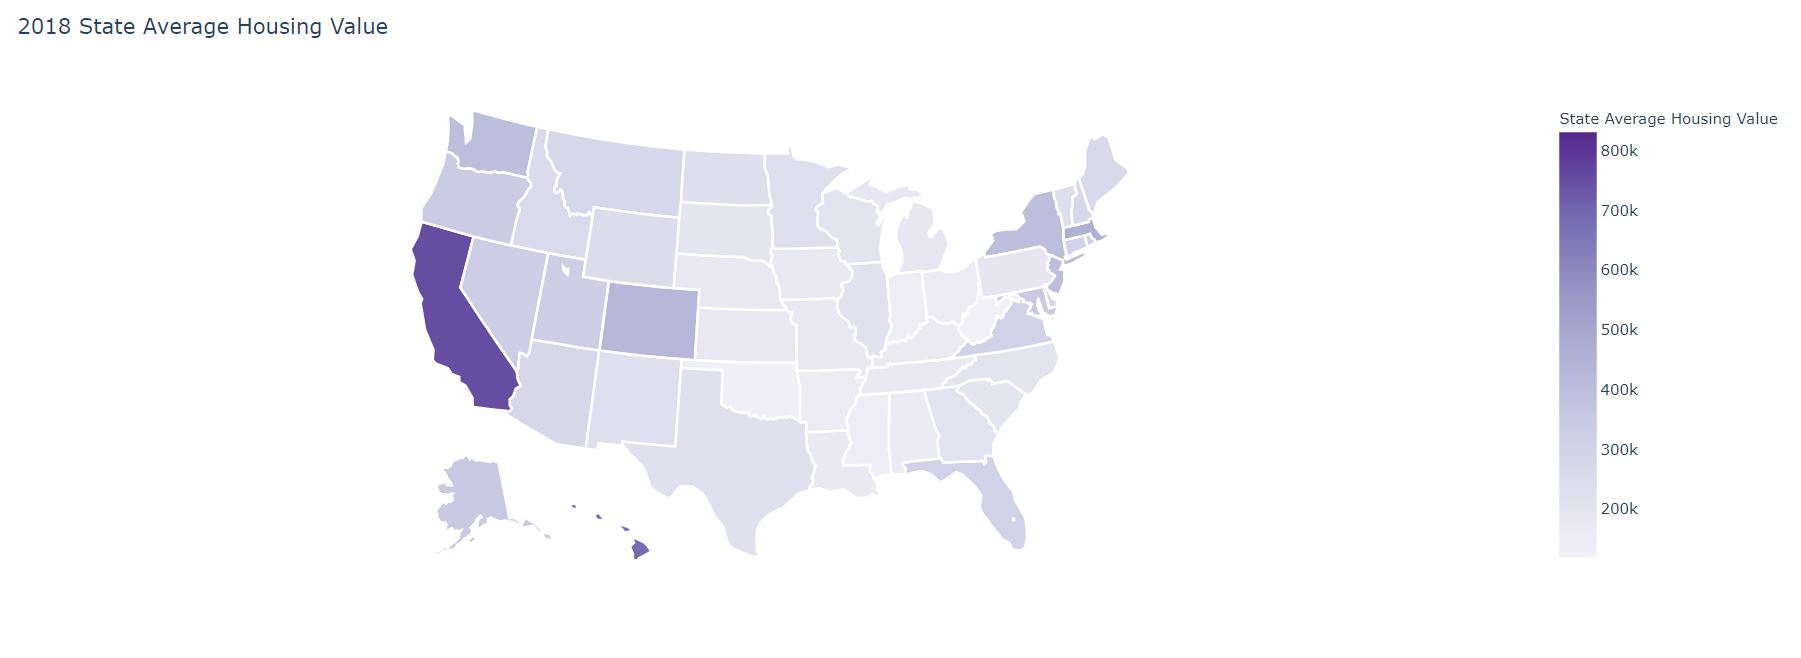

In [129]:
from IPython.display import Image
Image(filename='ThulasiRam_RuppaKrishnan_Lab2\\state_average_housing value.JPG') 